# Application of Quantum Computing To An Investment Portfolio. 

Importing Libraries.

In [1]:
from qiskit import Aer
from qiskit.circuit.library import TwoLocal
from qiskit.aqua import QuantumInstance
from qiskit.finance.applications.ising import portfolio
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.aqua.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import COBYLA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import yfinance as yf

The stock market data defining the symbols.

In [2]:
# MTN Group
tickerSymbol1 = 'MTN'
# Kumba Iron Ore
tickerSymbol2 = 'KIO'
# BHP BILTON
tickerSymbol4 = 'BHP'
#Vodacom
tickerSymbol6 = 'VOD'
# Multichoice Group
tickerSymbol7 = 'MCG'
# British America Tobacco
tickerSymbol8 = 'BTI'
# Anglo American 
tickerSymbol9 = 'AGL'

The stock market data defining the tickers.

In [3]:
# MTN Group
MTN= yf.Ticker(tickerSymbol1)
#Kumba Iron Ore
KIO = yf.Ticker(tickerSymbol2)
# BHP
BHP = yf.Ticker(tickerSymbol4)
# Vodacom
VOD= yf.Ticker(tickerSymbol6)
# Multichoice Group
MCG = yf.Ticker(tickerSymbol7)
# British America Tobacco
BTI = yf.Ticker(tickerSymbol8)
# Anglo American 
AGL= yf.Ticker(tickerSymbol9)

Stock market data defining the time period.

In [4]:
# Kumba Iron Ore
KIO = KIO.history(period ='1d',start = '2020-01-01',end = '2020-05-31' )
# MTN Group
MTN = MTN.history(period ='1d',start = '2020-01-01',end = '2020-05-31' )
# BHP
BHP = BHP.history(period ='1d',start = '2020-01-01',end = '2020-05-31' )
# Vodacom
VOD = VOD.history(period ='1d',start = '2020-01-01',end = '2020-05-31' )
# Multichoice Group
MCG = MCG.history(period ='1d',start = '2020-01-01',end = '2020-05-31' )
# British America Tobacco
BTI= BTI.history(period ='1d',start = '2020-01-01',end = '2020-05-31' )
# Anglo American 
AGL = AGL.history(period ='1d',start = '2020-01-01',end = '2020-05-31' )

Calculating the mean of each share using the closing price. 

In [5]:
KIO_mean = KIO['Close'].mean() 
MTN_mean = MTN['Close'].mean()
BHP_mean = BHP['Close'].mean() 
VOD_mean = VOD['Close'].mean()
MCG_mean = MCG['Close'].mean()
BTI_mean = BTI['Close'].mean()
AGL_mean = AGL['Close'].mean()

Defining a vector to hold the mean results.

In [6]:
mu = np.array([KIO_mean,MTN_mean,BHP_mean,VOD_mean,MCG_mean,BTI_mean,AGL_mean])

Viewing the mean.

In [7]:
mu

array([  12.26259615,  195.31480769,   42.97855769,   16.04336538,
       1625.57692308,   38.3625    ,   24.74173077])

Isolating the closing price for each share.

In [9]:
KIO_array = np.array(KIO['Close'])
MTN_array = np.array(MTN['Close'])
BHP_array = np.array(BHP['Close'])
VOD_array = np.array(VOD['Close'])
MCG_array = np.array(MCG['Close'])
BTI_array = np.array(BTI['Close'])
AGL_array = np.array(AGL['Close'])


Tranposing the arrays.

In [10]:
KIO_array = np.transpose(KIO_array)
MTN_array = np.transpose(MTN_array)
BHP_array = np.transpose(BHP_array)
VOD_array = np.transpose(VOD_array)
MCG_array = np.transpose(MCG_array)
BTI_array = np.transpose(BTI_array)
AGL_array = np.transpose(AGL_array)

Defining a data frame to hold the closing price.

In [11]:
data = pd.DataFrame([KIO_array,MTN_array,BHP_array,VOD_array,MCG_array,BTI_array,AGL_array])

Viewing the data frame. 

In [12]:
data

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,14.48,14.61,14.55,14.65,14.64,14.75,14.76,14.75,14.69,14.76,...,10.08,10.37,10.38,10.62,10.64,10.69,10.83,11.11,11.06,11.17
1,236.87,240.48,240.76,242.29,241.50,245.67,249.94,248.30,251.64,248.04,...,168.93,189.05,188.54,189.67,192.89,194.94,197.06,206.95,199.53,198.33
2,52.12,52.32,51.97,51.91,51.91,52.17,51.67,51.81,52.16,52.58,...,40.54,43.92,43.97,44.97,44.65,44.61,45.03,45.31,45.79,46.18
3,18.79,18.89,18.75,18.80,18.67,18.76,19.33,19.14,19.15,19.80,...,14.32,15.27,15.03,15.17,15.29,15.47,15.50,15.75,16.04,16.05
4,1780.00,1770.00,1800.00,1800.00,1700.00,1770.00,1770.00,1700.00,1620.00,1600.00,...,1650.00,1650.00,1700.00,1700.00,1650.00,1650.00,1600.00,1650.00,1660.00,1560.00
5,40.80,41.19,41.95,42.36,42.98,43.63,43.61,43.45,43.62,43.48,...,36.68,37.46,36.83,37.83,37.90,38.15,38.94,39.75,39.73,39.37
6,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,...,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00


Transposing the data frame.

In [13]:
data = data.transpose()

Viewing the transposed data frame.

In [14]:
data

,0,1,2,3,4,5,6
0,14.48,236.87,52.12,18.79,1780.0,40.80,25.0
1,14.61,240.48,52.32,18.89,1770.0,41.19,25.0
2,14.55,240.76,51.97,18.75,1800.0,41.95,25.0
3,14.65,242.29,51.91,18.80,1800.0,42.36,25.0
4,14.64,241.50,51.91,18.67,1700.0,42.98,25.0
...,...,...,...,...,...,...,...
99,10.69,194.94,44.61,15.47,1650.0,38.15,24.0
100,10.83,197.06,45.03,15.50,1600.0,38.94,24.0
101,11.11,206.95,45.31,15.75,1650.0,39.75,24.0
102,11.06,199.53,45.79,16.04,1660.0,39.73,24.0


Filling in null entries. 

In [15]:
data = data.fillna('0')

Viewing the complete data frame.

In [16]:
data

,0,1,2,3,4,5,6
0,14.48,236.87,52.12,18.79,1780.0,40.80,25.0
1,14.61,240.48,52.32,18.89,1770.0,41.19,25.0
2,14.55,240.76,51.97,18.75,1800.0,41.95,25.0
3,14.65,242.29,51.91,18.80,1800.0,42.36,25.0
4,14.64,241.50,51.91,18.67,1700.0,42.98,25.0
...,...,...,...,...,...,...,...
99,10.69,194.94,44.61,15.47,1650.0,38.15,24.0
100,10.83,197.06,45.03,15.50,1600.0,38.94,24.0
101,11.11,206.95,45.31,15.75,1650.0,39.75,24.0
102,11.06,199.53,45.79,16.04,1660.0,39.73,24.0


Viewing the final shape of the data frame.

In [17]:
print(data.shape)

(104, 7)


Calculating the covariance of the data frame.

In [18]:
data_cov = data.cov()

Viewing covariance matrix.

In [19]:
data_cov

,0,1,2,3,4,5,6
0,5.158138,81.855254,12.566506,5.820947,201.039750,7.581203,0.971670
1,81.855254,1514.292047,244.709314,101.733558,3694.526326,137.258986,12.475471
2,12.566506,244.709314,44.592378,16.723918,591.587733,24.423081,0.953609
3,5.820947,101.733558,16.723918,7.293844,250.673282,9.516524,0.968546
4,201.039750,3694.526326,591.587733,250.673282,13240.440627,333.971359,26.189283
5,7.581203,137.258986,24.423081,9.516524,333.971359,15.526194,0.342419
6,0.971670,12.475471,0.953609,0.968546,26.189283,0.342419,2.686090


Converting the covariance data frame into a matrix.

In [20]:
sigma = np.array(data_cov)

Viewing the covariance matrix.

In [21]:
sigma

array([[5.15813785e+00, 8.18552544e+01, 1.25665057e+01, 5.82094749e+00,
        2.01039750e+02, 7.58120316e+00, 9.71670220e-01],
       [8.18552544e+01, 1.51429205e+03, 2.44709314e+02, 1.01733558e+02,
        3.69452633e+03, 1.37258986e+02, 1.24754712e+01],
       [1.25665057e+01, 2.44709314e+02, 4.45923775e+01, 1.67239185e+01,
        5.91587733e+02, 2.44230813e+01, 9.53609317e-01],
       [5.82094749e+00, 1.01733558e+02, 1.67239185e+01, 7.29384390e+00,
        2.50673282e+02, 9.51652354e+00, 9.68545575e-01],
       [2.01039750e+02, 3.69452633e+03, 5.91587733e+02, 2.50673282e+02,
        1.32404406e+04, 3.33971359e+02, 2.61892830e+01],
       [7.58120316e+00, 1.37258986e+02, 2.44230813e+01, 9.51652354e+00,
        3.33971359e+02, 1.55261937e+01, 3.42418932e-01],
       [9.71670220e-01, 1.24754712e+01, 9.53609317e-01, 9.68545575e-01,
        2.61892830e+01, 3.42418932e-01, 2.68609018e+00]])

Plotting the covariance matrix.

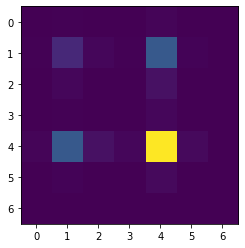

In [23]:
# plot sigma
plt.imshow(sigma, interpolation='nearest')
#plt.show()
#plt.title('Covariance M')
plt.savefig('CovarianceMatrix.jpg')

Defining parameters for mean variance optimisation problem.

In [213]:
num_assets = 7
q = 0.5                   # set risk factor
budget = num_assets //2   # set budget
penalty = num_assets      # set parameter to scale the budget penalty term

qubitOp, offset = portfolio.get_operator(mu, sigma, q, budget, penalty)

Defining the print function.

In [216]:
def index_to_selection(i, num_assets):
    s = "{0:b}".format(i).rjust(num_assets)
    x = np.array([1 if s[i]=='1' else 0 for i in reversed(range(num_assets))])
    return x

def print_result(result):
    selection = sample_most_likely(result.eigenstate)
    value = portfolio.portfolio_value(selection, mu, sigma, q, budget, penalty)
    print('Optimal: selection {}, value {:.4f}'.format(selection, value))
        
    eigenvector = result.eigenstate if isinstance(result.eigenstate, np.ndarray) else result.eigenstate.to_matrix()
    probabilities = np.abs(eigenvector)**2
    i_sorted = reversed(np.argsort(probabilities))
    print('\n----------------- Full result ---------------------')
    print('selection\tvalue\t\tprobability')
    print('---------------------------------------------------')
    for i in i_sorted:
        x = index_to_selection(i, num_assets)
        value = portfolio.portfolio_value(x, mu, sigma, q, budget, penalty)    
        probability = probabilities[i]
        print('%10s\t%.4f\t\t%.4f' %(x, value, probability))

Applying a classical solver.

In [217]:
exact_eigensolver = NumPyMinimumEigensolver(qubitOp)
result = exact_eigensolver.run()

print_result(result)

Optimal: selection [0 0 0 1 0 1 1], value -55.5670

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 0 0 1 0 1 1]	-55.5670		1.0000
[1 1 1 1 1 1 1]	11327.6029		0.0000
[1 1 1 1 1 0 0]	10742.9489		0.0000
[1 0 0 0 0 1 0]	-25.7017		0.0000
[0 1 0 0 0 1 0]	675.4908		0.0000
[1 1 0 0 0 1 0]	748.2437		0.0000
[0 0 1 0 0 1 0]	-19.8587		0.0000
[1 0 1 0 0 1 0]	-16.3945		0.0000
[0 1 1 0 0 1 0]	916.9408		0.0000
[1 1 1 0 0 1 0]	1016.2603		0.0000
[0 0 0 1 0 1 0]	-26.4793		0.0000
[1 0 0 1 0 1 0]	-29.7607		0.0000
[0 1 0 1 0 1 0]	767.3444		0.0000
[1 1 0 1 0 1 0]	859.9183		0.0000
[0 0 1 1 0 1 0]	-13.0147		0.0000
[1 0 1 1 0 1 0]	10.2704		0.0000
[0 1 1 1 0 1 0]	1039.5184		0.0000
[1 1 1 1 0 1 0]	1158.6588		0.0000
[0 0 0 0 1 1 0]	5305.0153		0.0000
[1 0 0 0 1 1 0]	5496.9528		0.0000
[0 1 0 0 1 1 0]	9691.6319		0.0000
[1 1 0 0 1 1 0]	9979.4246		0.0000
[0 0 1 0 1 1 0]	5893.3438		0.0000
[1 0 1 0 1 1 0]	6111.8477		0.0000
[0 1 1 0 1 

In [218]:
backend = Aer.get_backend('statevector_simulator')
seed = 50

cobyla = COBYLA()
cobyla.set_options(maxiter=500)
ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=3, entanglement='full')
vqe = VQE(qubitOp, ry, cobyla)
vqe.random_seed = seed

quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

result = vqe.run(quantum_instance)

print_result(result)

Optimal: selection [0. 0. 1. 1. 0. 1. 1.], value -27.1488

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 0 1 1 0 1 1]	-27.1488		0.1710
[0 0 1 1 0 0 1]	-37.8314		0.1164
[0 0 0 1 0 1 0]	-26.4793		0.0941
[0 0 0 1 0 1 1]	-55.5670		0.0822
[0 0 0 1 0 0 0]	15.6036		0.0713
[1 0 1 1 0 1 1]	11.1080		0.0643
[1 0 0 1 0 1 0]	-29.7607		0.0572
[0 0 1 0 0 0 1]	-36.1274		0.0407
[0 0 1 1 0 1 0]	-13.0147		0.0321
[0 0 0 0 0 0 1]	4.6013		0.0315
[1 0 0 1 0 1 1]	-43.8768		0.0268
[1 0 1 1 0 1 0]	10.2704		0.0264
[1 0 0 1 0 0 1]	-37.7175		0.0263
[0 0 0 0 0 0 0]	63.0000		0.0262
[1 0 1 1 0 0 0]	-7.6510		0.0255
[1 0 1 0 0 0 1]	-39.2728		0.0205
[0 0 1 0 0 0 0]	7.3176		0.0170
[1 0 0 1 0 0 0]	-9.2590		0.0156
[1 0 0 0 0 0 0]	18.3165		0.0148
[1 0 0 0 0 0 1]	-25.1105		0.0112
[1 0 1 1 0 0 1]	-21.1558		0.0106
[1 0 1 0 0 0 0]	-10.7994		0.0078
[0 0 0 1 0 0 1]	-27.8266		0.0043
[0 0 1 0 0 1 0]	-19.8587		0.0013
[1 0 0 0 0 1 0]	-25.7017		0

In [219]:
backend = Aer.get_backend('statevector_simulator')
seed = 50

cobyla = COBYLA()
cobyla.set_options(maxiter=250)
qaoa = QAOA(qubitOp, cobyla, 3)

qaoa.random_seed = seed

quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

result = qaoa.run(quantum_instance)

print_result(result)

Optimal: selection [0. 1. 0. 0. 0. 1. 0.], value 675.4908

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 0 0 0 1 0]	675.4908		0.0504
[1 1 1 0 0 0 1]	868.5985		0.0371
[0 1 0 1 0 1 1]	764.7322		0.0313
[1 1 1 1 0 0 0]	989.4784		0.0281
[0 1 0 0 0 0 0]	589.8312		0.0265
[0 0 0 1 0 0 1]	-27.8266		0.0244
[0 1 1 0 1 0 1]	10089.8353		0.0242
[0 1 1 0 0 1 1]	914.3136		0.0240
[1 0 1 1 0 1 1]	11.1080		0.0207
[0 1 1 1 0 1 0]	1039.5184		0.0191
[1 0 1 0 0 0 0]	-10.7994		0.0187
[0 0 0 1 1 0 1]	5236.6794		0.0174
[1 0 0 1 0 0 0]	-9.2590		0.0164
[0 0 0 0 0 1 0]	-2.5994		0.0146
[0 1 0 0 1 0 0]	9258.0009		0.0141
[1 0 1 1 0 0 1]	-21.1558		0.0136
[0 1 0 1 0 0 0]	658.1683		0.0136
[1 1 0 0 1 1 1]	10017.0047		0.0130
[1 1 0 1 1 0 1]	9915.2500		0.0127
[0 1 1 0 0 0 0]	792.8582		0.0125
[1 0 1 0 0 1 1]	-30.5255		0.0123
[1 1 1 1 1 0 1]	10796.1087		0.0122
[0 0 0 0 1 0 1]	5004.4340		0.0119
[0 1 1 0 0 0 1]	775.8886		0.0118
[0 1 0 0